

# Project: Investigate a Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

<ul>
<li>ScheduledDay - tells us on what day the patient set up their appointment.</li>
<li>Neighborhood - indicates the location of the hospital.</li>
<li>Scholarship - indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>Hypertension, Diabetes, Alcoholism, and Disability Columns - Indicate if the patient has the specified ailment. </li>
</ul>

### Question(s) for Analysis
1. Is there a correlation between no show appointments and socioeconmic status? 
2. Which patient characteristic is the strongest indicator a patient will show up to an appointment? 

In [49]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
%matplotlib inline




<a id='wrangling'></a>
## Data Wrangling

Here I am reading the csv file into a variable to prepare for analysis

In [50]:
#Loading data set and preparing for analysis
df = pd.read_csv('noshowappointments-2016.csv')

# Reviewing data types and looking for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Showing the first 5 lines of the data set. 

In [51]:
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Showing a summary of the data set. 

In [52]:
df.describe()
    


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
In the next section we will need to take some time making some adjustments to the data set to make it easier to read and understandable. Here are some areas within the data set that will need to be cleaned: 

    Column names will need to be renamed into American English standards. 
    SchdeuledDay and Appointment Day will need to be modified to the DateTime data type.
    The column "No Show" data values, yes or no, will need to be changed to boolean data type. 
    Change the values in the No_Show column to reflect "True" = Yes or "False" = No. 

**Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
  

First, we will rename the following columns: Neighbourhood,Hipertension,Handcap, No-show. The new column names will read: Neighborhood, Hypertension, Disabled, No_show. 

In [53]:
#renaming each of the columns noted above
df.rename(columns = {'Neighbourhood': 'Neighborhood', 'Hipertension': 'Hypertension','Handcap': 'Disabled','No-show':'No_show'}, inplace = True)
#Preview new names
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Second, we are changing the datatypes for the ScheduleDay and AppointmentDay columns to reflect the datatime data type. 

In [54]:
#Modifiing columns that should have the datetime data type. 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
#Observing change
df.dtypes



PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighborhood                   object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Disabled                        int64
SMS_received                    int64
No_show                        object
dtype: object

Change the values in the No_Show column to reflect "True" = Yes or "False" = No. 

In [55]:

df['No_show'].replace({"Yes": 1 , "No": 0}, inplace = True)


Removing erraneous data that can misconstue the findings. 

In [56]:
#Query in Age column where Age is less than 0 
df.query('Age < 0')
#Replacing with mean value
df.Age=df.Age.replace(-1, df.Age.mean())
#Checking Data 
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,No_show


Checking for duplicate data

In [57]:
#Checking for duplicate
sum(df.duplicated())

0

Lets Save Our Data to a new file!

In [58]:
df.to_csv('noshowappointments_clean.csv', index=False)


<a id='eda'></a>
## Exploratory Data Analysis

<h3> Questions to be answered:</h3><br>
1 - Is there a correlation between no show appointments and socioeconmic status?<br>
2 - Which patient characteristic is the strongest indicator a patient will show up to an appointment?

Here we are comparing the number of patients that showed up to their appointment and are recieving a scholarship vs the number of patients who showed up to their appointment that do not recieve a sholarship. 

Load our cleaned Dataset 

In [59]:
df = pd.read_csv('noshowappointments_clean.csv')

First lets take time to review the whole picture of our data using a histogram chart. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


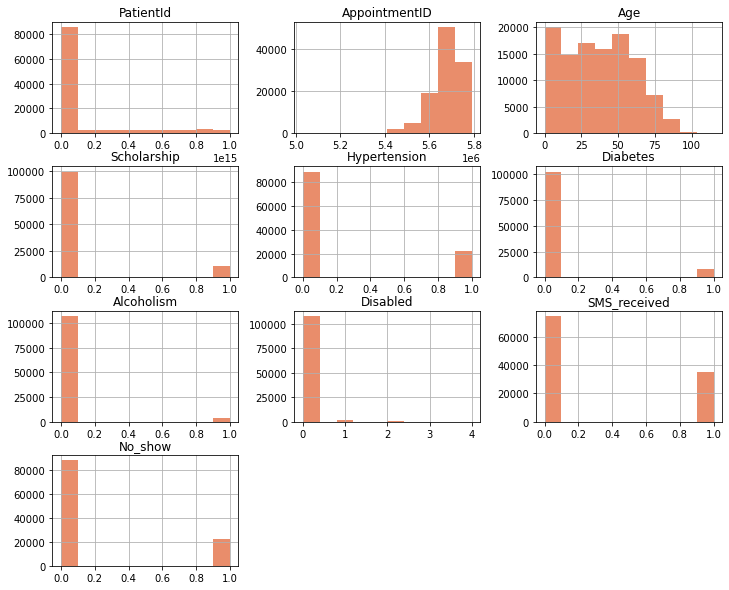

In [75]:
df.hist(figsize=(12,10))
plt.legend()

First, lets try to answer our first question: 

 Is there a correlation between no show appointments and socioeconmic status? 

Lets create a function that populates the mean of No Shows grouped by any other column.

In [60]:
def No_Show_Value_Counts(column): 
    return df.groupby(column).No_show.mean()

Lets call our function. Enter any column (Case Sensitive) to view the results. 

In [76]:
#df.groupby("Scholarship").No_show.value_counts()
column = input() 

KeyboardInterrupt: Interrupted by user

Lets look at the mean of No shows grouped by Scholarship. We will use these values to graph. 

In [ ]:
column = "Scholarship" 
no_show_scholarship = No_Show_Value_Counts(column)
print(no_show_scholarship)

Lets graph our findings using a bar graph and madplotlib

[Text(0, 0, 'No Scholarship'), Text(1, 0, 'Scholarship')]

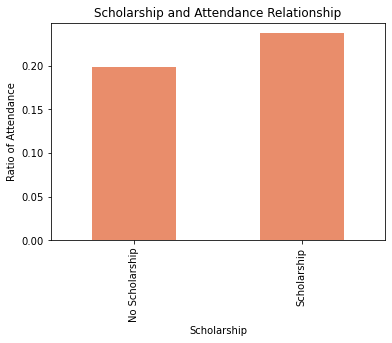

In [73]:
locations = [0,1]
labels = ["No Scholarship", "Scholarship"]
fig, ax = plt.subplots()
no_show_scholarship.plot(kind = 'bar')
plt.title(label = 'Scholarship and Attendance Relationship')
ax.set_ylabel("Ratio of Attendance")
ax.set_xticks(locations)
ax.set_xticklabels(labels)


Lets move on to our next question. 

Which patient characteristic is the strongest indicator a patient will show up to an appointment?

Lets review the patient characteristics. We have the following patient characteristics: 
    
Gender                         
Age                             
Neighborhood                   
Scholarship                     
Hypertension                    
Diabetes                        
Alcoholism                     

I will evaluate the different characteristics and then decide with ailment of (Hypertension,Diabetes, and Alcoholism) has a greater impact on attendance. 


Here I am creating a mask I will use to compare each ailment to No Shows. 

In [64]:
showed = df['No_show'] == 0
no_showed = df['No_show'] == 1


First we are seeing how Age has an affect on attendance using a histograph. 
Here it looks  like the 0-20 & 50-60 age group have a higher rate of showing up to appointments. 

count    110527.000000
mean         37.089219
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

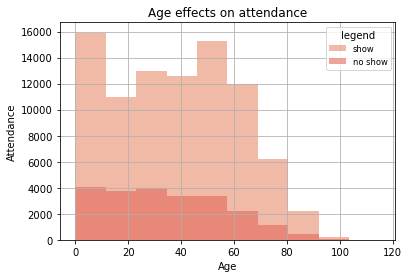

In [82]:
df.Age[showed].hist(alpha=0.6,label='show')
df.Age[no_showed].hist(alpha=0.6,label='no show')
plt.legend(title="legend", loc=1, fontsize='small', fancybox=True);
plt.ylabel("Attendance")
plt.xlabel("Age")
plt.title("Age effects on attendance")
#Lets see more information on the Age colomn, The average age being 37 years old. 
df.Age.describe()

Next, we are creating a bar chart that shows the amount of No Shows and Shows based on gender. 
Females showed up to more appointments then males and also have a higher count of no shows. 

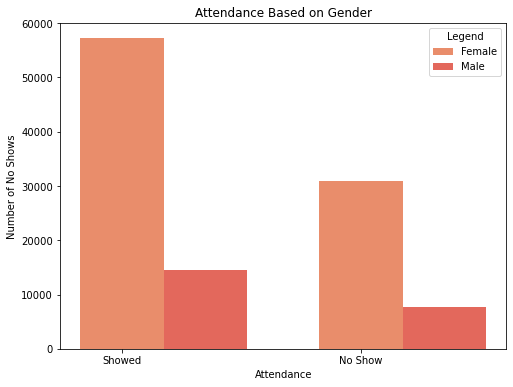

In [88]:
df['Gender'].replace({1: "F" , 0: "M"}, inplace = True)

data1 = df.Gender[showed].value_counts()
data2 = df.Gender[no_showed].value_counts()
width = .35
locations = [0,1]
labels = ['Showed','No Show']
x = np.arange(len(data1))
fig, axs = plt.subplots(figsize=(8, 6))
plt.bar(x, data1, width=width, label = 'Female')
plt.bar(x + width, data2, width=width, label = 'Male')
plt.ylabel("Number of No Shows")
plt.xlabel("Attendance")
plt.title("Attendance Based on Gender")
axs.xaxis.set_major_locator(ticker.MaxNLocator(2))
axs.set_xticks(x, labels)
plt.legend(title="Legend");




Using another bar chart we are view which neighborhood had the most amount of No_shows by neighborhood. 
Jardim Camburi had the leading amount No_shows. 

Text(0.5, 0, 'Neighborhood')

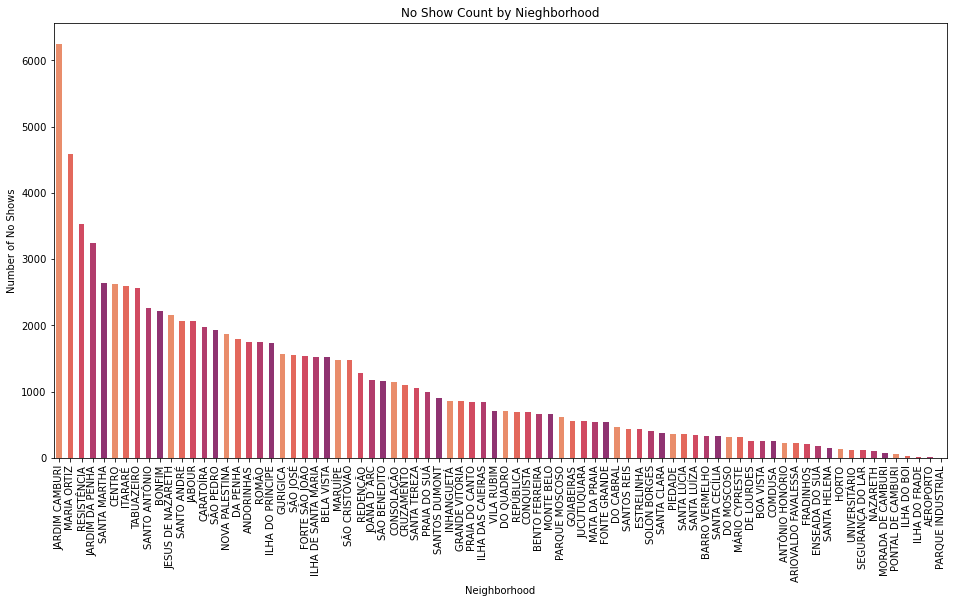

In [85]:
colors = sea.color_palette('flare')[0:-1]
sea.set_palette(sea.color_palette(colors))
df.Neighborhood[showed].value_counts().plot(kind = 'bar', figsize = (16, 8), color = colors)
plt.title(label = "No Show Count by Nieghborhood")
plt.ylabel("Number of No Shows")
plt.xlabel("Neighborhood")



Here is a Historgram showing a sample grab of dates from the month of January 1970, comparing the amount of No shows to people who showed.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
labels = ['Showed', 'Noshowed']
df.groupby("No_show")["AppointmentDay"].hist(label = ["Showed", "No Show"])



locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
plt.title(label = 'Attendance By Appointment Day (Sample)');

Next, we are comparing the No_show value counts of  Hypertension, Diabetes & Alcoholism. 

Here we have a grouped bar graph. 


In [ ]:
# plot bars in stack manner
data1 =df.Hypertension[no_showed].value_counts()
data2 =  df.Diabetes[no_showed].value_counts()
data3 = df.Alcoholism[no_showed].value_counts()

width = .2
locations = [0,1,2]
labels = ['Showed','No Show']
x = np.arange(len(data1))
fig, axs = plt.subplots(figsize=(8, 6))
plt.bar(x, data1, width=width, label = 'Hypertension', alpha= 0.9)
plt.bar(x + width, data3, width=width, label = 'Alcoholism', alpha= 0.9)
plt.bar(x + width +.2 , data2, width=width, label = 'Diabetes', alpha= 0.9)


axs.xaxis.set_major_locator(ticker.MaxNLocator(2))
axs.set_xticks(x, labels)
plt.legend(title="Attendance Based on Ailment");




Here we are showing the percentage of No_shows in ["Hypertension", "Diabetes", "Alcoholism"]. 

In [ ]:
colors = sea.color_palette('flare')[0:8]
sea.set_palette(sea.color_palette(colors))

No_show_pie = [data1[0], data2[0], data3[0]]
showed_pie = [data1[1], data2[1], data3[1]]

labels = ["Hypertension", "Diabetes", "Alcoholism"]
plt.pie(No_show_pie, labels = labels, colors = colors, autopct='%.0f%%')
plt.title(label = "Percentage of No Shows Per Ailment")



Here we are showing the percentage of people who showed in ["Hypertension", "Diabetes", "Alcoholism"]. 

In [ ]:
plt.pie(showed_pie, labels = labels, colors = colors, autopct='%.0f%%')
plt.title(label = "Percentage of Shows Per Ailment")

<a id='conclusions'></a>
### Conclusion

1. Is there a correlation between no show appointments and socioeconmic status?

   From the data present it seem slike there is a correlations between socioecononmic status and whether people show up to appointments. The rate of people who attend appointment with no scholarship is higher than people who have a scholarship. 
   

2. Which patient characteristic is the strongest indicator a patient will show up to an appointment? 

   Comparing 3 Ailments Hypertension, Diabetes, and Alcoholism. People labeled with hypertension have a low number of No shows compared to the other 2 ailments. This could suggest that people who have hyertension are more likely to show up to appointments. 

### Limitation

 1. One limitation of this data set is marjority of the data is categorical. More numerical data would've made the data set more useful when making sound conclusions such as patient BMi, travel time to office, income. 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])